Magnetic Spectrometer Code Analysis
Author: Jason Cardarelli
2019

Normalized Units for Code:
The code is normalized to the base units of m, e, c, e, and $\omega_{c0}=q B_0/m$. This is similar to the OSIRIS unit system, but with $\omega_{c0}$, the cyclotron frequency of the central longitudinal energy, replacing $\omega_p$. The corrections to measures are as follows: <br>
$t'= t*\omega_{c0}$ <br>
$x'= x*\omega_{c0}/c$ <br>
$B'= B*e/(c*m*\omega_{c0}) = B/B_0$ <br>
$Energy' = Energy/(mc^2) = \gamma$ <br>

In [32]:
!pwd
%cd ../../source_code/
!make
!./run
%cd ../data/analysis/

/Users/jcardar/research/magneticSpectrometerCode/continuous_field/data/analysis
/Users/jcardar/research/magneticSpectrometerCode/continuous_field/source_code
g++  -c -o obj/mag_spec_tracker.o mag_spec_tracker.cpp -Iinclude -std=c++17
g++  -o run obj/mag_spec_tracker.o obj/particle.o obj/beam.o obj/screen.o obj/magnet.o obj/my_functions.o -Iinclude -std=c++17
particle number 1
Particle Out of Magnet.
Out of bounds in x.
Particle Out of Magnet.
Out of bounds in x.
particle number 2
Particle Out of Magnet.
Out of bounds in x.
Particle Out of Magnet.
Out of bounds in x.
particle number 3
Particle Out of Magnet.
Out of bounds in x.
Particle Out of Magnet.
Out of bounds in x.
particle number 4
Particle Out of Magnet.
Out of bounds in x.
Particle Out of Magnet.
Out of bounds in x.
particle number 5
Particle Out of Magnet.
Out of bounds in x.
Particle Out of Magnet.
Out of bounds in x.
particle number 6
Particle Out of Magnet.
Out of bounds in x.
Particle Out of Magnet.
Out of bounds in x.
par

In [33]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import csv
import numpy as np
import itertools
import math

In [34]:
with open("../XPOS.csv") as csvfile:    
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    posx = list(csv_reader);
#     print(posx)
#     posx = [[float(y) for y in x[0:-1]] for x in posx]
    posx = [[float(y) for y in x] for x in posx]

In [35]:
with open("../YPOS.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',',quoting=csv.QUOTE_NONNUMERIC);
    line_count = 0;
    posy = list(csv_reader);
    posy = [[float(y) for y in x] for x in posy]

In [36]:
with open("../ZPOS.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    posz = list(csv_reader);
#     posz = [[float(y) for y in x[0:-1]] for x in posz]
    posz = [[float(y) for y in x] for x in posz]

In [37]:
with open("../MOMENTUM_X.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    px = list(csv_reader);
    px = [[float(y) for y in x] for x in px]

In [38]:
with open("../MOMENTUM_Y.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    py = list(csv_reader);
    py = [[float(y) for y in x] for x in py]

In [39]:
with open("../MOMENTUM_Z.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    pz = list(csv_reader);
    pz = [[float(y) for y in x] for x in pz]

In [40]:
with open("../TIME.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    time = list(csv_reader);
    time = [[float(y) for y in x] for x in time]
#     time = [[float(y) for y in x] for x in time]

In [41]:
with open("../ENERGY.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    energy = list(csv_reader);
    energy = [[float(y) for y in x] for x in energy]

In [42]:
magnet = pd.read_csv("../MAGNETS.csv")

In [43]:
screen = pd.read_csv("../SCREENS.csv")

In [44]:
del_time = pd.read_csv("../DEL_T.csv", dtype=float, header = -1)

<IPython.core.display.Javascript object>


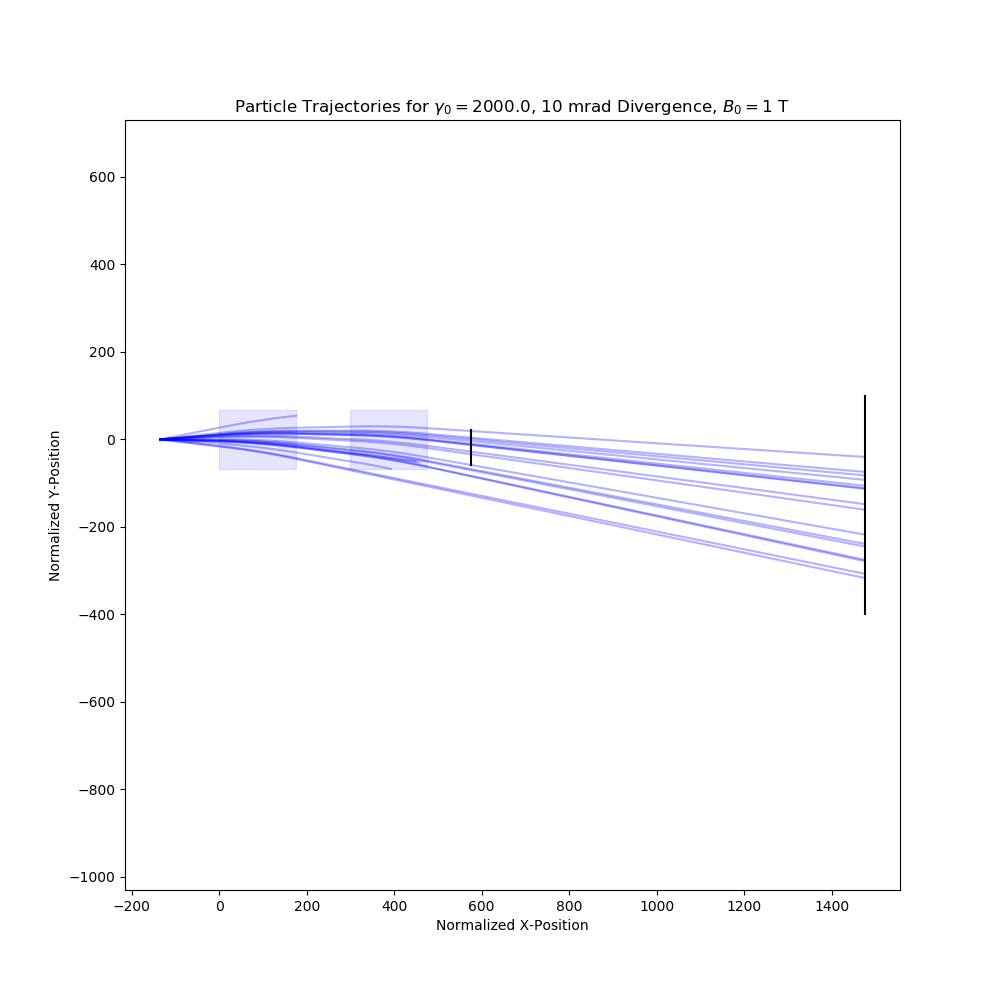

In [60]:
import scipy.constants as const
num_par    = len(posx);
gamma      = energy[0][0];
rL_norm    = np.sqrt(-(1 - gamma*gamma)/(gamma*gamma))*gamma;

fig, ax = plt.subplots(figsize = (10,10))
for ii in range(num_par):
#     ax.plot(posx[ii], posy[ii],'.', label='$\Delta t$ = %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));
#     ax.plot([jj/(1.75851E-11/const.c) for jj in posx[ii]], [jj/(1.75851E-11/const.c) for jj in posy[ii]], label=f'energy = {energy[ii][0]:.1f}');
    ax.plot(posx[ii], posy[ii], label=f'energy = {energy[ii][0]:.1f}', color='b', alpha = 0.3);
#     ax.scatter(posx[ii], posy[ii],'.', label=f'energy = {energy[ii][0]:.1f}');
# rL_BAR_circ = plt.Circle((0, 0), rL_norm, color='r', fill = False, lw=10, ls ='--', label='Analytic orbit', alpha=1);
# ax.add_patch(rL_BAR_circ);
# ax.legend(bbox_to_anchor=(1, 1));
ax.set_xlabel('Normalized X-Position');
ax.set_ylabel('Normalized Y-Position');
# ax.set_title('Particle Trajectory Time Step Test for $\gamma = %.1f$' % (energy[0][0]));
ax.set_title('Particle Trajectories for $\gamma_0 = %.1f$, 10 mrad Divergence, $B_0 =1$ T' % (2000));
num_mag = 2
for ii in range(num_mag):
    rect = patches.Rectangle((magnet.iloc[ii][2],(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2))),magnet.iloc[ii][5],magnet.iloc[ii][6],linewidth=1,edgecolor='b',facecolor='b', fill=True, alpha=0.1)
    plt.ylim((magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01),(magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01))
    ax.add_patch(rect)
    plt.xlim()

num_screen = len(screen.index);
# num_screen = 0;
for ii in range(num_screen):
    screenX = np.array([screen.iloc[ii][1],screen.iloc[ii][1]+(screen.iloc[ii][6]*np.cos(np.deg2rad(screen.iloc[ii][4])))])
    screenY = np.array([screen.iloc[ii][2],screen.iloc[ii][2]+(screen.iloc[ii][6]*np.sin(np.deg2rad(screen.iloc[ii][4])))])
    plt.plot(screenX,screenY,'-k')
    plt.xlim(0, screen.iloc[ii][1]+(screen.iloc[ii][5]*np.cos(np.deg2rad(screen.iloc[ii][4]))));
# plt.savefig('Trajectories.png',dpi=300, bbox_inches = "tight")
ax.axis('equal');

In [ ]:
num_par    = len(posx);
fig, ax = plt.subplots()
for ii in range(num_par):
    ax.plot(px[ii], py[ii],'.', label='$\Delta t =$ %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));
ax.legend(bbox_to_anchor=(1, 1));
ax.set_xlabel('Normalized X-Momentum');
ax.set_ylabel('Normalized Y-Momentum');
ax.set_title('Particle Momenta Time Step Test for $\gamma = %.1f$' % (energy[0][0]));
# plt.savefig('Momenta_Time_Test.png',dpi=300, bbox_inches = "tight")

In [ ]:
num_par    = len(posx);
fig, ax = plt.subplots();
for ii in range(num_par):
    ax.plot(px[ii], pz[ii],'.', label='$\Delta t =$ %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));
ax.legend(bbox_to_anchor=(1, 1));
ax.set_xlabel('Normalized X-Momentum');
ax.set_ylabel('Normalized Z-Momentum');
ax.set_title('Particle Momenta Time Step Test for $\gamma = 10$');
# plt.savefig('Momenta_Around_dt_1.png',dpi=300, bbox_inches = "tight")

In [ ]:
import scipy.constants as const
num_par     = len(posx);
gamma       = energy[0][0];
rL_norm     = np.sqrt(-(1 - gamma*gamma)/(gamma*gamma))*gamma;
# rL_norm     = 9.9498743710662;
rel_err     = [[(1 - ((np.sqrt((posx[i][jj])**2 + posy[i][jj]**2))/(rL_norm))) for jj in range(len(posx[i]))] for i in range(num_par)]
rel_err_avg = [sum(row)/len(row) for row in rel_err]
rel_err_max = [max(row) for row in rel_err]

fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize = (10,10));


for ii in range(num_par):
    ax1.plot(posx[ii], posy[ii],'.', label='$\Delta t$ = %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));
rL_BAR_circ = plt.Circle((0, 0), rL_norm, color='r', fill = False, lw=10, ls ='--', label='Analytic orbit', alpha=1);
ax1.add_patch(rL_BAR_circ);
ax1.legend(bbox_to_anchor=(1, 1));
ax1.set_xlabel('X-Position');
ax1.set_ylabel('Y-Position');
ax1.set_title('Relative Error Particle Time Step Test for $\gamma = %.1f$' % (energy[0][0]));

time_norm = [[jj/(3.14*2*gamma) for jj in x] for x in time]
for ii in range(num_par):
    if ii<0:
        continue
    ax2.plot(time_norm[ii], rel_err[ii], label='$\Delta t$ = %.2f /$\omega_{c0}$' % (del_time.loc[ii][0]));

ax2.set_xlabel('Normalized Time (Relativistic Cyclotron Period)');
ax2.set_ylabel('Relative Error in Orbit');
ax2.set_xlim(0,4);


ax3.plot(del_time/(const.pi*2*gamma), np.abs(rel_err_avg),'o-')
# ax3.set_title("Boris Algorithm: Time Resolution & Spatial Relative Error")
ax3.set_xlabel("Normalized Time Step (Relativistic Cyclotron Period)");
ax3.set_ylabel("Avg. Relative Error In Orbit");
ax3.set_xscale('log', basex=2)
ax3.set_yscale('log', basey=2)
# ax3.get_yaxis().get_major_formatter().set_useOffset(False)


In [ ]:
num_par     = len(posx);
gamma       = energy[0][0];
rL_norm    = np.sqrt(-(1 - gamma*gamma)/(gamma*gamma))*gamma;
abs_err     = [[(np.sqrt((posx[i][jj])**2 + posy[i][jj]**2) - rL_norm) for jj in range(len(posx[i]))] for i in range(num_par)]
abs_err_avg = [sum(row)/len(row) for row in abs_err]
abs_err_max = [max(row) for row in abs_err]

fig, [ax2, ax3, ax4] = plt.subplots(3,1, figsize = (10,10));


# for ii in range(num_par):
#     ax1.plot(posx[ii]/rL_norm, posy[ii]/rL_norm,'.', label='$\Delta t$ = %.2f *$T_{rel. gyro.}$' % (del_time.loc[ii][0]/(2*const.pi*gamma)));
# #     ax.plot(posx[ii], posy[ii],'.');
# # rL_BAR_circ = plt.Circle((0, 0), rL_norm, color='r', fill = False, lw=10, ls ='--', label='Analytic orbit', alpha=1);
# rL_BAR_circ = plt.Circle((0, 0), 1.0, color='r', fill = False, lw=10, ls ='--', label='Analytic orbit', alpha=1);
# ax1.add_patch(rL_BAR_circ);
# ax1.legend(bbox_to_anchor=(1, 1));
# # ax1.set_xlabel('X-Position');
# ax1.set_ylabel('X/Y-Position');
# ax1.set_title('Absolute Error Particle Time Step Test for $\gamma = %.1f$' % (energy[0][0]));

time_norm = [[jj/(const.pi*2*gamma) for jj in x] for x in time]
for ii in range(num_par):
    if ii<0:
        continue
    ax2.plot(time_norm[ii], abs_err[ii], label='$\Delta t$ = %.2f *$T_{rel. gyro.}$' % (del_time.loc[ii][0]/(2*const.pi*gamma)));
ax2.set_title('Absolute Error Particle Time Step Test for $\gamma = %.1f$' % (energy[0][0]));
ax2.legend(bbox_to_anchor=(1.15, 0.3));
ax2.set_xlabel('Normalized Time (Relativistic Cyclotron Period)');
ax2.set_ylabel('Absolute Error in Orbit');
# ax2.set_title('Time Resolved Error for $\gamma = 5$, Time Limit$ = 8 \pi \gamma$');
ax2.set_xlim(0,10);



ax3.plot(del_time/(const.pi*2*gamma), np.abs(abs_err_avg),'o-')
# ax3.set_title("Boris Algorithm: Time Resolution & Spatial Relative Error")
ax3.set_xlabel("Normalized Time Step (Relativistic Cyclotron Period)");
ax3.set_ylabel("Avg. Absolute Error In Orbit");
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
# ax3.set_xscale('log', basex=2)
ax3.set_yscale('log', basey=2)
# ax3.set_xlim(0,0.015625);
# plt.tight_layout()
# Average relative error per cycle over time for each particle???
# print(np.abs(rel_err_avg));



# ax4.plot(del_time/(const.pi*2*gamma), abs_err_max, 'o-')
ax4.plot(del_time/(const.pi*2*gamma), [ii*const.c*const.m_e/(const.e*1.0) for ii in abs_err_max], 'o-')
ax4.set_ylabel("Max. Absolute Error In Orbit [m]");
ax4.set_xlabel("Normalized Time Step (Relativistic Cyclotron Period)");
# ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax4.set_xscale('log', basex=2)
ax4.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# ax5.set_yscale('log', basey=2)

In [63]:
magnet

,Num,Bz(norm),mag_posx,mag_posy,mag_posz,length,width,height
0,1,1,0,0,0,175.851,134.819,200.6
1,2,1,300,0,0,175.972,134.819,200.6


<IPython.core.display.Javascript object>


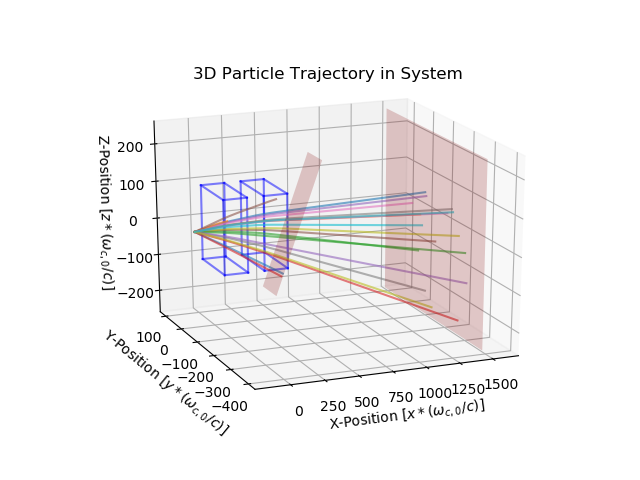

/Users/jcardar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/jcardar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


In [70]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
omega_c_norm = const.elementary_charge*1/const.m_e;

num_par    = len(posx);

for ii in range(len(magnet.index)):
    rx = [magnet.iloc[ii][2], magnet.iloc[ii][2] + magnet.iloc[ii][5]]
    ry = [magnet.iloc[ii][3] - (magnet.iloc[ii][6]/2.0), magnet.iloc[ii][3] + (magnet.iloc[ii][6]/2.0)]
    rz = [magnet.iloc[ii][4] - (magnet.iloc[ii][7]/2.0), magnet.iloc[ii][4] + (magnet.iloc[ii][7]/2.0)]
    ax.plot(rx, [ry[0], ry[0]], [rz[0], rz[0]], 'b', alpha = 0.5)
    ax.plot(rx, [ry[1], ry[1]], [rz[1], rz[1]], 'b', alpha = 0.5)
    ax.plot(rx, [ry[0], ry[0]], [rz[1], rz[1]], 'b', alpha = 0.5)
    ax.plot(rx, [ry[1], ry[1]], [rz[0], rz[0]], 'b', alpha = 0.5)
    ax.plot([rx[0], rx[0]], ry, [rz[0], rz[0]], 'b', alpha = 0.5)
    ax.plot([rx[1], rx[1]], ry, [rz[1], rz[1]], 'b', alpha = 0.5)
    ax.plot([rx[0], rx[0]], ry, [rz[1], rz[1]], 'b', alpha = 0.5)
    ax.plot([rx[1], rx[1]], ry, [rz[0], rz[0]], 'b', alpha = 0.5)
    ax.plot([rx[0], rx[0]], [ry[0], ry[0]], rz, 'b', alpha = 0.5)
    ax.plot([rx[1], rx[1]], [ry[1], ry[1]], rz, 'b', alpha = 0.5)
    ax.plot([rx[0], rx[0]], [ry[1], ry[1]], rz, 'b', alpha = 0.5)
    ax.plot([rx[1], rx[1]], [ry[0], ry[0]], rz, 'b', alpha = 0.5)
    
for ii in range(len(screen.index)):
    xx, yy = np.meshgrid([screen.iloc[ii][1] - np.abs(screen.iloc[ii][7]*0.5*np.sin(np.deg2rad(screen.iloc[ii][5]))), screen.iloc[ii][1] + screen.iloc[ii][6]*np.cos(np.deg2rad(screen.iloc[ii][4])) + np.abs(screen.iloc[ii][7]*0.5*np.sin(np.deg2rad(screen.iloc[ii][5])))],[screen.iloc[ii][2], screen.iloc[ii][2] + screen.iloc[ii][6]*np.sin(np.deg2rad(screen.iloc[ii][4]))])
#     print(f'xx is {xx}')
    z = - ( np.sin(np.deg2rad(screen.iloc[ii][4]))*np.cos(np.deg2rad(screen.iloc[ii][5]))*(screen.iloc[ii][1] - xx) - (np.cos(np.deg2rad(screen.iloc[ii][4]))*np.cos(np.deg2rad(screen.iloc[ii][5]))*(1 - np.sin(np.deg2rad(screen.iloc[ii][5]))) - np.cos(np.deg2rad(screen.iloc[ii][4]))*(np.sin(np.deg2rad(screen.iloc[ii][5]))**2))*(screen.iloc[ii][2] - yy) - np.sin(np.deg2rad(screen.iloc[ii][4]))*np.sin(np.deg2rad(screen.iloc[ii][5]))*screen.iloc[ii][3] ) / (np.sin(np.deg2rad(screen.iloc[ii][4]))*np.sin(np.deg2rad(screen.iloc[ii][5])))
#     print(f'z is {z}')
#     print(f'z type is {type(z)}')
    if screen.iloc[ii][4] == 0 or screen.iloc[ii][5] == 0:
        z = [[screen.iloc[ii][3] - (screen.iloc[ii][7]*0.5), screen.iloc[ii][3] + (screen.iloc[ii][7]*0.5)],[screen.iloc[ii][3] - (screen.iloc[ii][7]*0.5), screen.iloc[ii][3] + (screen.iloc[ii][7]*0.5)]]
        z = np.array(z);
    ax.plot_surface(xx, yy, z, alpha=0.2, color = 'r')

for ii in range(num_par):
#     if ii < 9 and ii > 9:
#         continue
    ax.plot(posx[ii], posy[ii], posz[ii], alpha=0.6);
x_left, x_right = ax.get_xlim();
ax.set_xlim(x_left - 1, x_right + 100);

# labels_x = [item.get_text() for item in ax.get_xticklabels()];
# print(labels_x)
# labels_x = [ii*(omega_c_norm/const.c) for ii in labels_x];
# ax.set_xticklabels(labels_x)

# labels_y = [item.get_text() for item in ax.get_yticklabels()];
# labels_y = [ii*(omega_c_norm/const.c) for ii in labels_y];
# ax.set_yticklabels(labels_y)

# labels_z = [item.get_text() for item in ax.get_zticklabels()];
# labels_z = [ii*(omega_c_norm/const.c) for ii in labels_z];
# ax.set_zticklabels(labels_z)

ax.set_xlabel(r"X-Position [$x*(\omega_{c,0} / c)$]")
ax.set_ylabel(r"Y-Position [$y*(\omega_{c,0} / c)$]")
ax.set_zlabel(r"Z-Position [$z*(\omega_{c,0} / c)$]")

ax.set_title("3D Particle Trajectory in System")

ax.view_init(20, -100);

Next cell is to make a gif of particle trajectory:

In [ ]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

num_dumps = len(posx);
gif_file_name_to_save = 'BorisTimeStepTrajectories_trail_space.gif';
relative_path_to_save = './';
posx_max = max(max(posx));
posy_max = max(max(posy));
posx_min = min(min(posx));
posy_min = min(min(posy));

def den_plot(dump,ii):
    if ii > 0:
        plt.close();
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(posx[dump][ii-2:ii+2],posy[dump][ii-2:ii+2], '.', label='del_t = %.2f /$\omega_{c0}$' % (del_time.loc[dump][0]));
    rL_BAR_circ = plt.Circle((0, 0), 10, color='r', fill = False, lw=1, ls ='--', label='Analytic orbit', alpha=0.5);
    ax.add_patch(rL_BAR_circ);
    ax.legend(bbox_to_anchor=(1, 1));
    ax.set_xlim(-15, 15);
    ax.set_ylim(-15, 15);
    ax.set_xlabel('Normalized X-Position');
    ax.set_ylabel('Normalized Y-Position');
    ax.set_title('Particle Trajectory Time Step Test for gamma = 10, time limit 20*pi*gamma');
    
#     plt.axis('off')
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image  = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave((relative_path_to_save + gif_file_name_to_save) , [den_plot(i,ii) for i in range(num_dumps-2) for ii in range(int(len(posx[i])/10))], fps=30)

In [ ]:
# print(posz)

In [ ]:
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(20,16));
ax.plot(posx[0], posy[0],'.');
ax.set_xlabel(r"X Position [ Normalized(c/$\omega _{c,0})]$");
ax.set_ylabel(r"Y Position [Normalized (c/$\omega _{c,0})]$");
ax.set_title("X & Y Positions for electrons in ");

In [ ]:
#NORMALIZING UNIT SYSTEM:
E0 = 1000            #MeV
B0 = 1               #T
qe = 1.602*10**-19   #C
me = 9.11* 10**-31   #kg
c  = 299792458       #m/s
gamma0 = (E0+0.511)/0.511


omegaNorm  = (qe*B0)/(me)
lengthNorm = omegaNorm/c


v_perp0  = c*((1-(1/(gamma0*gamma0)))**0.5)
rL0_real = gamma0*me*v_perp0/(qe*B0)
rL0_BAR  = rL0_real*lengthNorm


cm_30    = 0.3*lengthNorm
cm_20    = 0.2*lengthNorm
cm_10    = 0.1*lengthNorm
cm_03    = 0.03*lengthNorm


#display('qe         = %.3E' % qe)
#display('me         = %.3E' % me)
#display('c          = %.3E' % c)
display('omegaNorm  = %.3E' % omegaNorm)
#display('lengthNorm = %.3E' % lengthNorm)
display('gamma0     = %.3f' % gamma0)
display("rL0_BAR    = %.3f" % rL0_BAR)
display("rL0_real   = %.3f" % rL0_real)
display("30 cm      = %.3f" % cm_30)
display("10 cm      = %.3f" % cm_10)
display("3 cm       = %.3f" % cm_03)

In [ ]:
plot_real_units = False

plot_pos = True
plot_mom = False
plot_lamour_radius = False
plot_magnet = False
plot_screen = False

In [ ]:
# num_par    = posx.shape[0]
num_par    = len(posx);
num_mag    = magnet.shape[0]
num_screen = screen.shape[0]

# %matplotlib inline 
mp.use('Agg')

plt.rcParams['figure.figsize'] = [10, 5]
fig,ax = plt.subplots(1)

if plot_pos == True:
    for ii in range(num_par):
        if plot_real_units == True:
#             plt.plot(posx.iloc[ii]/lengthNorm,posy.loc[ii]/lengthNorm,label='Energy = %.2f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
            ax.plot(posx[ii], posy[ii]);
        else:
#             ax.plot(posx,posy, label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (energy[ii][1]*0.511-0.511, del_time.loc[ii][0]))
            plt.plot(posx[ii],posy[ii], label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (float(energy[ii][1])*0.511-0.511, del_time.loc[ii][0]));
#             plt.plot(posx.iloc[ii],posy.iloc[ii],label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
        
if plot_mom == True:
    for ii in range(num_par):
        if plot_real_units == True:
            plt.subplot(floor(num_par/2),ceil(num_par/2),ii+1)
            plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.3f MeV' % (float(energy.iloc[ii][1])*0.511))
        else:
            plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
            plt.plot(px.iloc[ii]+10*ii,py.iloc[ii]+10*ii,label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1], del_time.loc[ii][0]))
            plt.legend()
            plt.xlabel('$p_x /(c m)$')
            plt.ylabel('$p_y /(c m)$')
    
if plot_screen == True:
    for ii in range(num_screen):
        screenX = np.array([screen.iloc[ii][1],screen.iloc[ii][1]+(screen.iloc[ii][5]*np.cos(np.radians(screen.iloc[ii][4])))])
        screenY = np.array([screen.iloc[ii][2],screen.iloc[ii][2]+(screen.iloc[ii][5]*np.sin(np.radians(screen.iloc[ii][4])))])
        if plot_real_units == True:
            plt.plot(screenX/lengthNorm,screenY/lengthNorm,'-k')
        else:
            plt.plot(screenX,screenY,'-k')
        
if plot_magnet == True:
    for ii in range(num_mag):
        if plot_real_units == True:
            rect = patches.Rectangle((magnet.iloc[ii][2]/lengthNorm,(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2))/lengthNorm),magnet.iloc[ii][5]/lengthNorm,magnet.iloc[ii][6]/lengthNorm,linewidth=1,edgecolor='k',facecolor='none')
            plt.ylim((magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01)/lengthNorm,(magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)/lengthNorm)
        else:
            rect = patches.Rectangle((magnet.iloc[ii][2],magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)),magnet.iloc[ii][5],magnet.iloc[ii][6],linewidth=1,edgecolor='k',facecolor='none')
            plt.ylim(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01,magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)
        ax.add_patch(rect)
        plt.xlim()

if plot_lamour_radius == True:
    if plot_real_units == True:
        rL_BAR_circ = plt.Circle((0, -rL0_BAR/lengthNorm), rL0_BAR/lengthNorm, color='r', fill = False, lw=5, ls ='--', label='RL0')
    else:
        rL_BAR_circ = plt.Circle((0, -rL0_BAR), rL0_BAR, color='r', fill = False, lw=3, ls ='--', label='analytic RL0')
    ax.add_patch(rL_BAR_circ)

ax.legend(loc='upper right',bbox_to_anchor=(1.44, 1.05));
if plot_real_units:
    plt.xlabel('x [m]');
    plt.ylabel('y [m]');
#else:
    #plt.xlabel('$p_x \omega_{c0} / c$')
    #plt.ylabel('$p_y \omega_{c0} / c$')
#plt.autoscale('both')
plt.title('Particle Orbits of Different Temporal Resolutions');